<a href="https://colab.research.google.com/github/LimDoHyeon/PKNU-MachineLearning/blob/main/%5BPKNU%5DML_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.2 학습할 수 있는 신경 모형 - 퍼셉트론
> 입력단자 x_i들이 계산 모형(퍼셉트론)으로 연결될 때 연결강도(weight) w_i에 의해 조정(곱셈) 후 모형으로 전달된다.

<퍼셉트론은 전달된 신호를 합하고 이 결과로부터 활성화 함수(activation)를 통해 최종 출력 y를 낸다.>

- 퍼셉트론 학습
  - 퍼셉트론은 모형의 출력과 정답을 비교해 오차를 줄이도록 **연결강도(모수)**를 바꿈, 이 과정이 학습
  - Heaviside(계단) 함수는 원조 신경망 퍼셉트론이 채택한 활성화 함수 -> 미분불가, ∴최적화 불가
  - Heaviside function 대신 sigmoid 함수 사용

- 인공 신경망의 하이퍼파라미터(외적 조건 - 학습과정, 속도 조절)
  - 연결강도 조정 정도 (비율, 속도)
  - 최적화 방법
  - 학습 반복 횟수(epoch)


대부분 이론, 수학 계산 중심의 내용이니 강의자료 참고.

#7.11 신경망을 설계, 학습하는 SW도구 : Tensorflow
- 구글에서 공개한 신경망 SW
- 케라스(keras)라는 심층신경망(DNN) 구현을 위한 API도 포함시켰다. 이덕에 간단히 신경망을 설계하고 학습시킬 수 있다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Tensorflow와 Keras를 사용할 수 있도록 준비
import tensorflow as tf
from tensorflow import keras

중간 개념 정리
- 모델 : 신경세포 계층이 차례로 이어저 순차적으로 신호를 전달하는 모델
  - keras에서 제공하는 Sequential 클래스로 정의
  - 3개 층 정의 - 예시로 들 회귀 모델은 뉴런이 각각 6개, 4개, 1개의 노드를 갖는 layer가 있고,
  - 각 층은 입력단 또는 이전 단계의 층의 노드와 완전 연결되어 있음, 이러한 연결을 "밀집(dense)계층"
  - 각 층 뉴런의 활성화 함수는 sigmoid 함수로 선택하자

In [6]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation = 'sigmoid'),
    keras.layers.Dense(4, activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

- 전체 데이터를 다 보기 전에 **임의로 선택된 일부 데이터 인스턴스만으로** 오차를 계산하고 그에 따라 즉시 경사 하강법을 적용하는 것을 확률적 경사 하강법(SGD)이라고 한다.
  - 일괄 데이터 경사하강법 - 전체 데이터를 보고 학습하는 방법
  - SGD가 빠른 학습, 더 좋은 결과 등의 장점이 있다.
- 모델 정의, 최적화법 선택 후 모델을 **컴파일**한다.
  - 컴파일 과정에서는 최적화 방법, 오차 측정 기준을 정한다.
  - 평균 제곱의 오차(mse)를 줄이고자 손실함수를 mse로 지정한다.

In [14]:
optimizer = keras.optimizers.SGD(learning_rate = 5.0)
model.compile(optimizer=optimizer, loss='mse')

#모델 학습
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()

#model.fit(X, y_label, epochs=100)

4/4 [==============================] - 0s 3ms/step


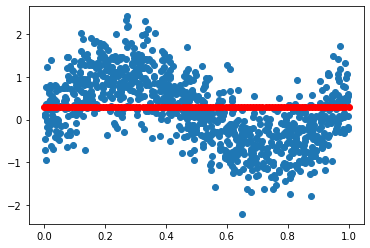

In [13]:
domain = np.linspace(0, 1, 100).reshape(-1, 1)
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')